**Ankit Sekseria**<br>
**D19005**<br>
**Varishu Pant**<br>
**D19033**

## Question 4:
*Read the context carefully:*<br>
Linkage defines the dissimilarity between two groups of observations. The three most common types of linkage—complete, average and single. Average, complete, and single linkage are most popular among statisticians. Average and complete linkage are generally preferred over single linkage, as they tend to yield more balanced dendrograms. 

Unsupervised techniques are often used in the analysis of genomic data. Consider the NCI60 cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines. You need to hierarchically cluster the cell lines in the NCI60 data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. To begin, we standardize the variables to have mean zero and standard deviation one.

*“The choice of linkage certainly does affect the results obtained. Typically, single linkage will tend to yield trailing clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced, attractive clusters.”*  Perform cluster analysis on the NC160 data and validate the statement and comment on your observations.


In [35]:
#Loading important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [36]:
nci=pd.read_csv('NCI60.csv') #reading data
nci.rename(columns={'Unnamed: 0':'Genes'},inplace=True) #renaming column name to Genes
nci.head()

,Genes,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [37]:
nci.Genes.value_counts() #unique count of each genes

NSCLC          9
RENAL          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
MCF7A-repro    1
K562B-repro    1
UNKNOWN        1
K562A-repro    1
MCF7D-repro    1
Name: Genes, dtype: int64

In [38]:
nci_scaled = nci.drop('Genes',axis=1).apply(lambda x: (x - np.mean(x)) / np.std(x)) #scaling the dataset
nci_scaled.describe().round(2) #mean=0,std=1

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,...,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00,64.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,...,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01,1.01
min,-2.38,-2.88,-3.93,-2.11,-1.77,-2.03,-2.56,-2.03,-2.12,-2.63,...,-2.00,-1.05,-1.30,-2.57,-2.34,-1.62,-1.77,-2.01,-1.85,-1.99
25%,-0.81,-0.50,-0.40,-0.92,-0.52,-0.47,-0.72,-0.54,-0.85,-0.78,...,-0.66,-0.52,-0.56,-0.57,-0.52,-0.53,-0.58,-0.71,-0.72,-0.83
50%,0.04,0.04,0.05,0.30,-0.05,-0.02,-0.05,0.07,-0.00,-0.03,...,0.09,-0.36,-0.27,-0.19,-0.16,-0.17,-0.08,0.16,-0.23,-0.10
75%,0.75,0.51,0.42,0.94,0.38,0.51,0.62,0.55,0.69,0.70,...,0.44,0.14,0.11,0.29,0.32,0.19,0.04,0.55,0.57,0.74
max,2.19,3.02,2.72,1.69,3.51,3.32,2.50,2.23,2.32,2.31,...,3.41,4.27,4.69,4.34,4.40,4.85,4.38,3.44,3.38,2.54


### Heirarchical Clustering using Single Linkage
- Our objective is to identify that how single linkage tend to yeild traiinling clusters:very large clusters onto which individual observations are attached one by one.

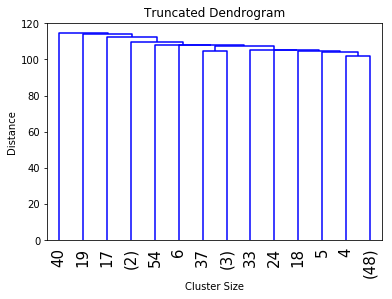

In [26]:
Z = linkage(nci_scaled, 'single')  #linkage type=single
dendrogram(Z,truncate_mode='lastp',p=14,leaf_rotation=90, leaf_font_size=15.) #n_cluster=14,as we have 14 unique classes
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()  #showing trailing clusters

In [27]:
import sklearn
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='single')
hclust.fit(nci_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=14,
                        pooling_func='deprecated')

In [28]:
nci_scaled['Labels_single']=hclust.labels_

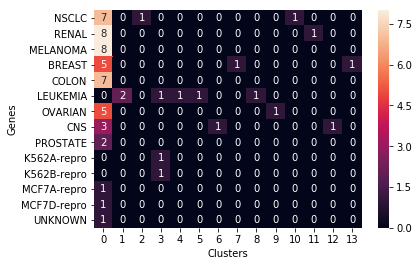

In [29]:
nci['Labels_single']=hclust.labels_
tab=pd.crosstab(nci.Genes,nci.Labels_single,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations.
- We can see in above plot that individual observations less in number gets clubbed together in one group,for example,cluster3,Cluster0 whereas in other linkage type,we will see a more attractive and balanced clusters.<br>
*Let's check for Complete Linkage below...*

### Heirarchical Clustering using Complete Linkage
- Our objective is to identify that complete linkage fails to merge close obsevation due to presence of outlier.

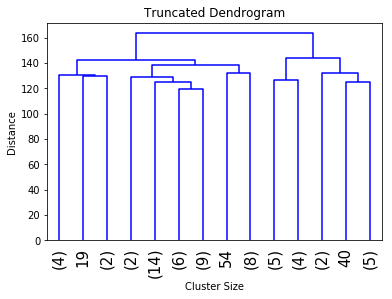

In [22]:
#building dendogram
from scipy.cluster.hierarchy import dendrogram, linkage  #linkage and dendogram
Z = linkage(nci_scaled, 'complete')
dendrogram(Z,truncate_mode='lastp',p=14,leaf_rotation=90, leaf_font_size=15.) #n_cluster=14,as we have 14 unique classes
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show() #more balanced clusters

In [52]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='complete') #complete linkage
hclust.fit(nci_scaled) #fitting on scaled data

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=14,
                        pooling_func='deprecated')

In [53]:
nci_scaled['Labels_comp']=hclust.labels_ #assigning labels

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,Labels
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675,2
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446,2
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838,2
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408,9
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992,1


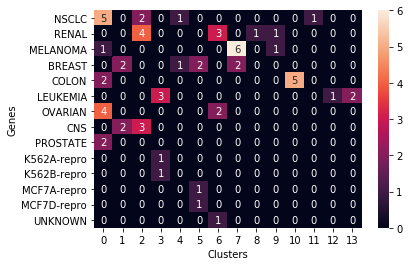

In [54]:
#plotting corss-tabular for clusters and genes
nci['Labels']=hclust.labels_
tab=pd.crosstab(nci.Genes,nci.Labels,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations
- We can see that cluster formed are more balanced then clusters formed from single linkage.
- But due to presence of outliers,cluster who belong to one cancer type has been clubed to other group for example,see colon cancer type in above plot,where 2 observations has been cllubbed with Cluster0 while it belongs to Cluster10(majority of observations are in Cluster10 for COLON cancer type)

### Heirarchical Clustering using Average Linkage
- Our objective is to identify that Average linkage gives more balanced clusters.

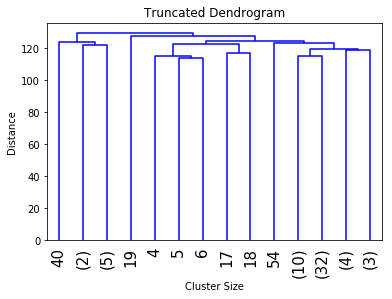

In [30]:
Z = linkage(nci_scaled, 'average') #linkae=average
dendrogram(Z,truncate_mode='lastp',p=14,leaf_rotation=90, leaf_font_size=15.) #number of clusters=14 
plt.title("Truncated Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show() #showing dendograms

In [31]:
from sklearn.cluster import AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='average') #average linkage
hclust.fit(nci_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=14,
                        pooling_func='deprecated')

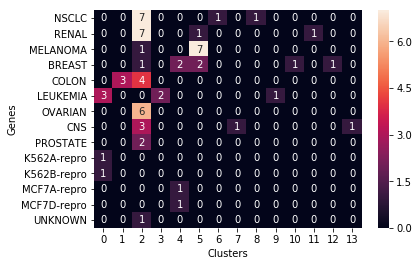

In [32]:
nci_scaled['Labels_avg']=hclust.labels_ #assigning labels
nci['Labels_avg']=hclust.labels_
tab=pd.crosstab(nci.Genes,nci.Labels_avg,margins=True).sort_values('All',ascending=False)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
sns.heatmap(tab,annot=True)
plt.xlabel('Clusters')
plt.show()

#### Observations
- Average linkage forms cluster in a more balanced way than single cluster,but in this case it is getting affected by the ouliers and no cluster has a specific Gene type.

### Conclusion
- We saw that linkage type can affect the cluster formed and for the above dataset Complete Linkage gives more accurate and balanced clusters.